# Exercise 1-1: Particle accelerating under suddenly turned-on force

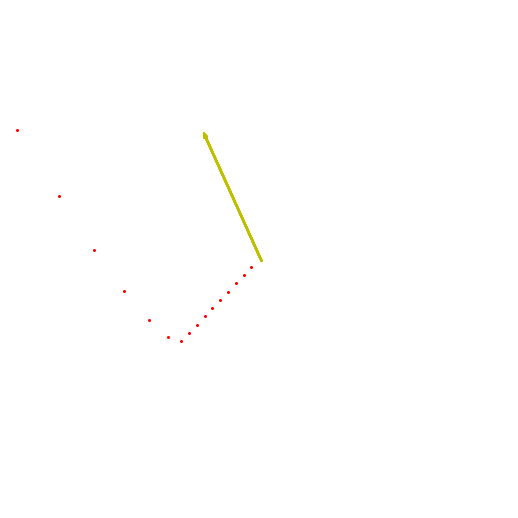

In [1]:
#  Particle accelerating under suddenly turned-on force

""" 
This program shows the paths of a particle starting at the origin and travelling in a random direction. After 10 timesteps a force with a random 
magnitude turns on and the particle accelerates in the direction of the force. The force magnitude and direction is shown by a yellow arrow.

Code translated from GW-BASIC provided in Exercise 1.1 of Stommel and Moore (1989)

author: Victoria McDonald
email: vmcd@atmos.washington.edu
website: https://github.com/torimcd/coriolis-sm

"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import random
%matplotlib inline

def rnd():
    ''' Helper function returns a random number between 0 and 1 '''
    rand = random.uniform(0,1)
    return rand

# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(-100, 100), ax.set_xticks([])
ax.set_ylim(-100, 100), ax.set_yticks([])

force_scale_factor = 10
arrow_scale_factor = 10
trajectory_scale_factor = 10

# Initialize the particles at 0,0 with random velocity
x = 0
y = 0

dx = trajectory_scale_factor*(rnd()-0.5)
dy = trajectory_scale_factor*(rnd()-0.5)

ddx = 0
ddy = 0

# set the force magnitude
force_x_direction = force_scale_factor*(rnd()-0.5)
force_y_direction = force_scale_factor*(rnd()-0.5)

# set arrow parameters
arrow_x = 1
arrow_y = -1
arrow_dx = arrow_scale_factor*force_x_direction
arrow_dy = arrow_scale_factor*force_y_direction

# Construct the splot to update as the particle moves
pos, = ax.plot([], [], 'ro', ms=2)

# function to animate the particle
def update(frame):
    global ddx 
    global ddy
    global dx
    global dy
    global x
    global y

    # draw the arrow showing the force
    arrow = ax.arrow(arrow_x, arrow_y, arrow_dx, arrow_dy, color='y', width=0.5, shape='full', visible=True)
    
    # for first 10 steps, force is zero and arrow is not visible
    if frame < 10:
        force_x = 0
        force_y = 0
        arrow.remove()
    else:
        # after 10 steps force turns on
        force_x = force_x_direction
        force_y = force_y_direction

    # update value of second dervatives
    ddx = force_x
    ddy = force_y

    # update value of first derivative
    dx = ddx + dx
    dy = ddy + dy

    # update position of x and y
    x = dx + x
    y = dy + y

    # set the new position of the particle to x, y
    pos.set_data(x, y)

    # plot it again so it persists
    ax.plot(x, y, 'ro', ms=2)

    return pos

def init():
    pos.set_data([], [])
    return pos

# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, init_func=init, frames=20, interval=500, repeat=False, blit=False)

# convert to a video to be embedded in web page
HTML(animation.to_html5_video())